In [23]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [24]:
# Load Dataset
file_path = "/kaggle/input/netflix-userbase-dataset/Netflix Userbase.csv"
df = pd.read_csv(file_path)
print(df.head)


<bound method NDFrame.head of       User ID Subscription Type  Monthly Revenue Join Date Last Payment Date  \
0           1             Basic               10  15-01-22          10-06-23   
1           2           Premium               15  05-09-21          22-06-23   
2           3          Standard               12  28-02-23          27-06-23   
3           4          Standard               12  10-07-22          26-06-23   
4           5             Basic               10  01-05-23          28-06-23   
...       ...               ...              ...       ...               ...   
2495     2496           Premium               14  25-07-22          12-07-23   
2496     2497             Basic               15  04-08-22          14-07-23   
2497     2498          Standard               12  09-08-22          15-07-23   
2498     2499          Standard               13  12-08-22          12-07-23   
2499     2500             Basic               15  13-08-22          12-07-23   

         

In [25]:
# Data Overview

print ("Data Types:")
print(df.dtypes)

print("\nMissing Values:")
print(df.isnull().sum())

Data Types:
User ID               int64
Subscription Type    object
Monthly Revenue       int64
Join Date            object
Last Payment Date    object
Country              object
Age                   int64
Gender               object
Device               object
Plan Duration        object
dtype: object

Missing Values:
User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64


In [26]:
# Date Convert
df["Join Date"] = pd.to_datetime(df["Join Date"], format="%d-%m-%y")
df["Last Payment Date"] = pd.to_datetime(df["Last Payment Date"], format="%d-%m-%y")

print(df.dtypes)

User ID                       int64
Subscription Type            object
Monthly Revenue               int64
Join Date            datetime64[ns]
Last Payment Date    datetime64[ns]
Country                      object
Age                           int64
Gender                       object
Device                       object
Plan Duration                object
dtype: object


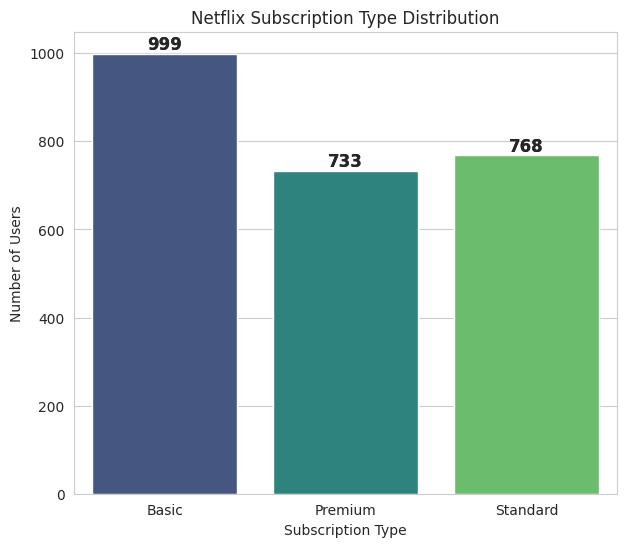

In [27]:
# Subscription Types Distribution
sns.set_style("whitegrid")
plt.figure(figsize=(7,6))
sns.countplot(x=df["Subscription Type"], palette="viridis")

ax = sns.countplot(x=df["Subscription Type"], palette="viridis")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title("Netflix Subscription Type Distribution")
plt.xlabel("Subscription Type")
plt.ylabel("Number of Users")
plt.show()

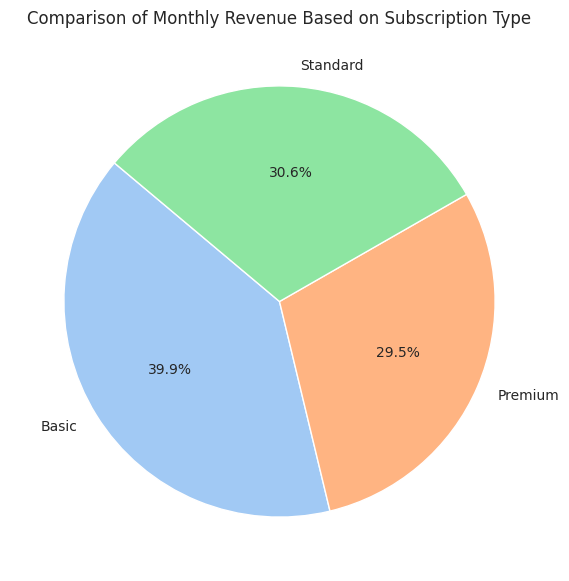

In [32]:
# Comparison of Monthly Revenue Based on Subscription Type
# Calculate subscription duration in months
df["Subscription Duration (Months)"] = (df["Last Payment Date"] - df["Join Date"]).dt.days / 30
df["Subscription Duration (Months)"] = df["Subscription Duration (Months)"].apply(np.ceil)  # Round up to full months

# Calculate total revenue per user
df["Total Revenue"] = df["Monthly Revenue"] * df["Subscription Duration (Months)"]

# Aggregate total revenue by Subscription Type
total_revenue_per_subscription = df.groupby("Subscription Type")["Total Revenue"].sum()

# Plot the Pie Chart
plt.figure(figsize=(7, 7))
colors = sns.color_palette("pastel")
plt.pie(total_revenue_per_subscription, labels=total_revenue_per_subscription.index, autopct="%1.1f%%", colors=colors, startangle=140)
plt.title("Comparison of Total Revenue Based on Subscription Type")
plt.show()

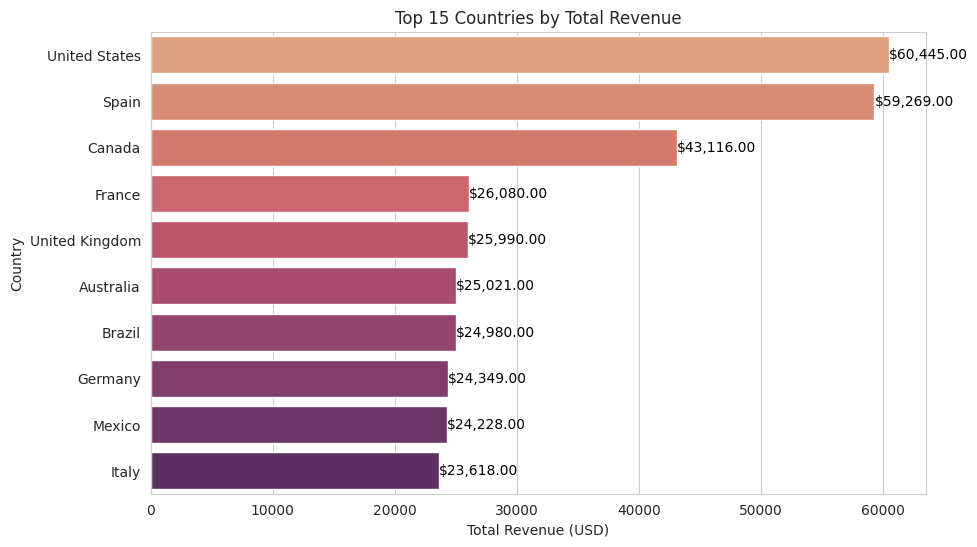

In [34]:
# Top 15 Countries by Total Revenue
plt.figure(figsize=(10, 6))
top_revenue_countries = df.groupby("Country")["Total Revenue"].sum().nlargest(15)
ax = sns.barplot(x=top_revenue_countries.values, y=top_revenue_countries.index, palette="flare")
plt.title("Top 15 Countries by Total Revenue")
plt.xlabel("Total Revenue (USD)")
plt.ylabel("Country")

# Annotate total revenue on bars
for i, value in enumerate(top_revenue_countries.values):
    ax.text(value, i, f"${value:,.2f}", va='center', ha='left', fontsize=10, color='black')

plt.show()

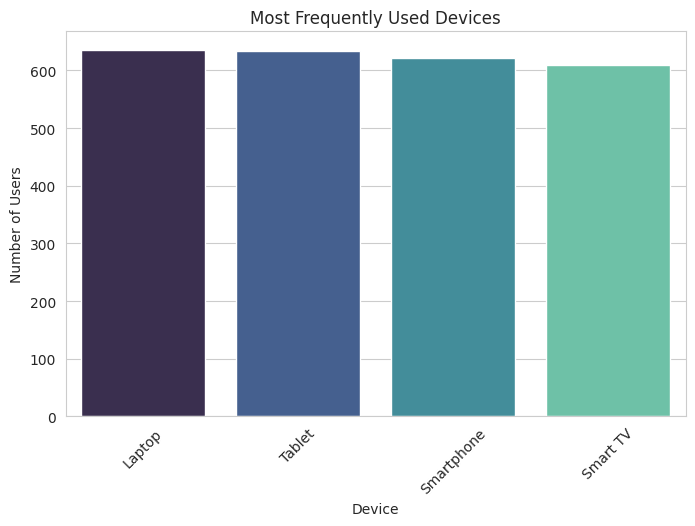

In [29]:
# Most Frequently Used Devices
plt.figure(figsize=(8, 5))
sns.countplot(x=df["Device"], palette="mako", order=df["Device"].value_counts().index)
plt.title("Most Frequently Used Devices")
plt.xlabel("Device")
plt.ylabel("Number of Users")
plt.xticks(rotation=45)
plt.show()

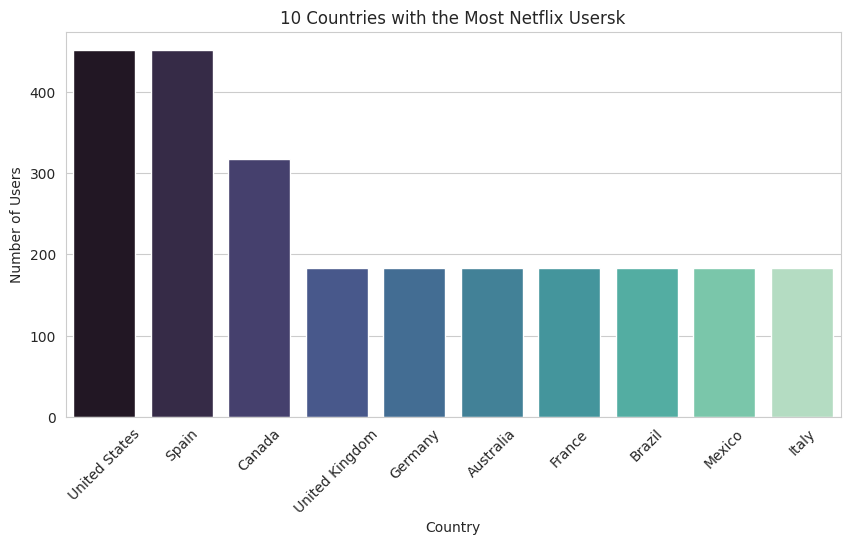

In [30]:
# Users by Country
plt.figure(figsize=(10, 5))
top_countries = df["Country"].value_counts().nlargest(10)  # Top 10 most users by country
sns.barplot(x=top_countries.index, y=top_countries.values, palette="mako")
plt.title("10 Countries with the Most Netflix Usersk")
plt.xlabel("Country")
plt.ylabel("Number of Users")
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


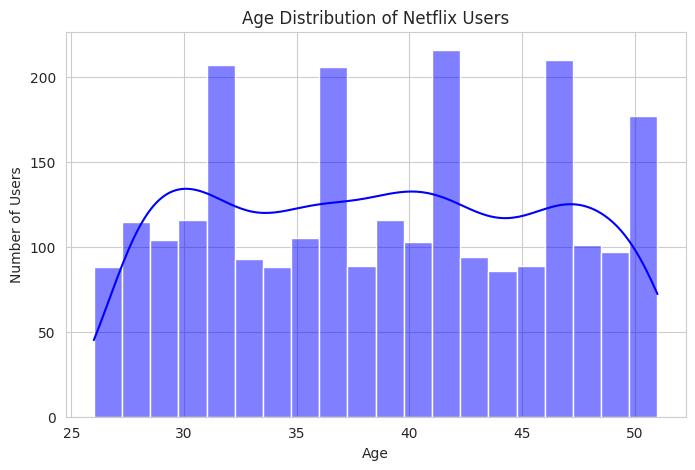

In [31]:
# Age Distribution of Users
plt.figure(figsize=(8, 5))
sns.histplot(df["Age"], bins=20, kde=True, color="blue")
plt.title("Age Distribution of Netflix Users")
plt.xlabel("Age")
plt.ylabel("Number of Users")
plt.show()

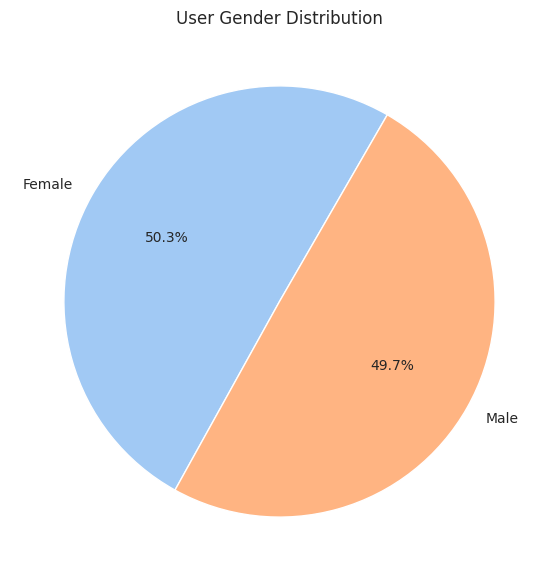

In [37]:
# Pie Chart of User Gender Distribution
plt.figure(figsize=(7, 7))
gender_counts = df["Gender"].value_counts()
colors = sns.color_palette("pastel")
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", colors=colors, startangle=60)
plt.title("User Gender Distribution")
plt.show()

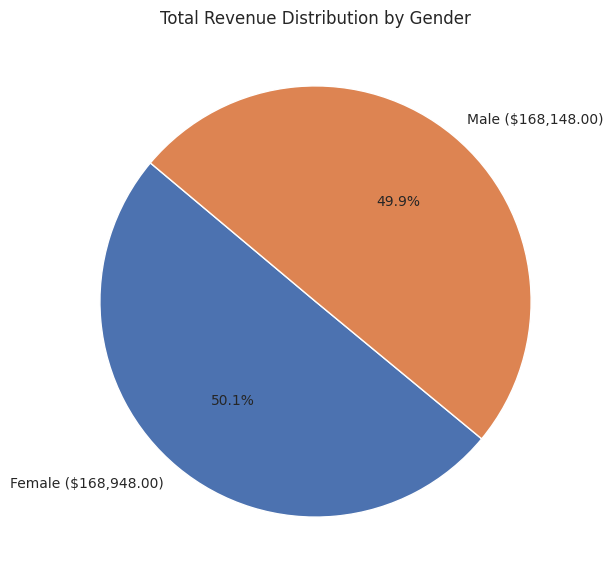

In [46]:
# Pie Chart of Total Revenue by Gender
plt.figure(figsize=(7, 7))
total_revenue_gender = df.groupby("Gender")["Total Revenue"].sum()
colors = sns.color_palette("deep")
plt.pie(total_revenue_gender, labels=[f"{gender} (${total_revenue_gender[gender]:,.2f})" for gender in total_revenue_gender.index], 
        autopct="%1.1f%%", colors=colors, startangle=140)
plt.title("Total Revenue Distribution by Gender")
plt.show()